<a id='intro'></a>
## Introduction

> using TMDb movie data set to do my analysis on it ; 
- this data set contian many movies with most information about the movies include the data and the details 
 ## questions to answer : 
 - Which genres are most popular from year to year?
 - Movies which had most and least profit ? 
 - Profitability vs Year of release ?
 - the most popular produced genres in 2010 compared to 2014?



In [235]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [236]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv("tmdb-movies.csv")
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [237]:
# To know how many films and how many columns 
df.shape

(10866, 21)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

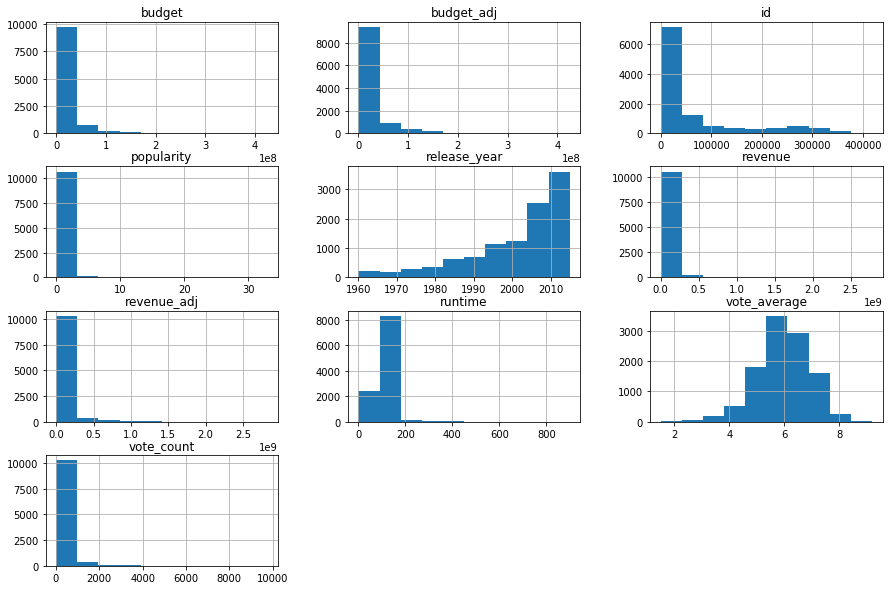

In [239]:
df.hist(figsize=(15,10));

In [240]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## There is many values with Zeros ( 0 ) in many important columns : 
- known them from the describe func

## There is columns which are not important in my analysis like :
- homepage
- release_date
- tagline
- overview
- imdb_id

## Deal with the nan and 0 values :
- there is alot of 0 values i saw when i did the histogram on this data set 
- many values in the revenue , budget , runtime , budget_adj and revenue_adj columns
- so what i will to :
- replace these values to nan and after i will drop the rows for these values 


### Data Cleaning 
- in this part i will clean my data to prepere it to the analysis process 
- replace the 0 values into nan values 
- remove the dupliacted rows 
- remove the missing values 
- also correct data types if it needed too 



## replace the 0 values into nan values 

In [241]:
df['revenue'].replace(0 , np.NAN , inplace = True)
df['budget'].replace(0 , np.NAN , inplace = True)
df['runtime'].replace(0 , np.NAN , inplace = True)
df['budget_adj'].replace(0 , np.NAN , inplace = True)
df['revenue_adj'].replace(0 , np.NAN , inplace = True)


## Drop The Nan Values In All The Dataset

In [242]:
df.dropna(axis=0 , inplace = True)

## Delete the unneeded columns 


In [243]:
df = df.drop(['homepage','release_date','tagline','overview','imdb_id'],axis = 1)

## Check For The 0 values in revenue , budget , runtime , budget_adj and revenue_adj columns

In [244]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03
mean,52557.491064,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094,5.462994e+07,1.991775e+08
std,74450.077163,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503,5.525463e+07,2.968515e+08
min,11.000000,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01
25%,5851.500000,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000,1.519180e+07,2.764890e+07
50%,20178.000000,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000,3.556927e+07,8.674770e+07
75%,62209.500000,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000,7.630125e+07,2.351178e+08
max,333348.000000,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


## Check If There Is Dupliacted rows 

In [245]:
sum(df.duplicated())

0

## Check For The missing Values 

In [246]:
df.isnull().any().sum()

0

## - Now My Data is Ready For the analysis !!

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

## Research Question 1: Which genres are most popular from year to year?


In [247]:
df_split = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))

In [248]:
df = df.join([df_split])
df.drop(['genres'] , axis = 1)


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3,genres_4,genres_5
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None
5,281957,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156.0,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015,1.241999e+08,4.903142e+08,Western,Drama,Adventure,Thriller,None
6,87101,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,125.0,Paramount Pictures|Skydance Productions,2598,5.8,2015,1.425999e+08,4.053551e+08,Science Fiction,Action,Thriller,Adventure,None
7,286217,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141.0,Twentieth Century Fox Film Corporation|Scott F...,4572,7.6,2015,9.935996e+07,5.477497e+08,Drama,Adventure,Science Fiction,None,None
8,211672,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91.0,Universal Pictures|Illumination Entertainment,2893,6.5,2015,6.807997e+07,1.064192e+09,Family,Animation,Adventure,Comedy,None
9,150540,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,94.0,Walt Disney Pictures|Pixar Animation Studios|W...,3935,8.0,2015,1.609999e+08,7.854116e+08,Comedy,Animation,Family,None,None


In [249]:
## Create a new Data Set to fill into it the generes and the release_year
gen = ['genres_1','genres_2','genres_3','genres_4','genres_5']
df_gen = pd.DataFrame() 
for i in gen:
    df_gen[i]=df[i]
df_gen['release_year'] = df['release_year']
df_gen.dropna( axis = 0 , inplace = True)
df_gen['release_year'] = df_gen['release_year'].astype(int) 



In [250]:
df_gen

,genres_1,genres_2,genres_3,genres_4,genres_5,release_year
20,Action,Family,Science Fiction,Adventure,Mystery,2015
37,Adventure,Animation,Comedy,Family,Fantasy,2015
46,Fantasy,Comedy,Animation,Science Fiction,Family,2015
49,Thriller,Comedy,Drama,Romance,Science Fiction,2015
59,Mystery,Crime,Action,Thriller,Drama,2015
66,Thriller,Drama,Adventure,Action,History,2015
121,Mystery,Thriller,Fantasy,Horror,Drama,2015
635,Adventure,Family,Animation,Action,Comedy,2014
645,Science Fiction,Action,Adventure,Fantasy,Comedy,2014
660,Fantasy,Adventure,Action,Family,Romance,2014


In [251]:
## Create list with the most genre 
most = []
## Create list with the unqiue years in the data set : 
unique_years = df_gen['release_year'].unique()
## show this list : 
unique_years

array([2015, 2014, 2009, 2010, 1999, 2001, 2008, 2011, 2012, 2003, 2013,
       2005, 2006, 2004, 2007, 1984, 1983, 1995, 1992, 1996, 1989, 1991,
       1990])

In [252]:
## Create For Loop To know the Genres diff : 
for i in unique_years:    
    uni_y = df_gen[df_gen['release_year'] == i] 
    filter_ = uni_y.drop(['release_year'], axis = 1)
    final = filter_.stack().value_counts().idxmax()
    # Add The Values to The list :
    most.append((i , final ))

gen_pop = pd.DataFrame(most, columns=['year','popular_genre'])

In [253]:
## Display The Years with most pop Genre :
gen_pop

,year,popular_genre
0,2015,Thriller
1,2014,Action
2,2009,Comedy
3,2010,Action
4,1999,Adventure
5,2001,Adventure
6,2008,Thriller
7,2011,Adventure
8,2012,Action
9,2003,Fantasy


## Research Question 2 : Movies which had most and least profit¶



In [254]:
## Create column with the profit earned :
df.insert(5,'profit_earned',df['revenue']-df['budget'])

In [255]:
## Create list with the unique films titles 
films = df.original_title.unique()

In [256]:
## for loop to get the index of the most high profit and the most low profit :
for film in films:
    ## index of max profit
    film_df = df['profit_earned'].idxmax()
    ## Store its Details in df 
    film_details = pd.DataFrame(df.loc[film_df])
    ## indes of min profit
    film2_df = df['profit_earned'].idxmin()
    ## Store its Details in Df
    film2_details = pd.DataFrame(df.loc[film2_df])

In [257]:
## Merge The two data sets 
filmss = pd.concat([film_details ,film2_details]  ,axis = 1 )

In [258]:
## Change Columns names :
filmss.columns = [ 'Highest' , ' Lowest']
## Display Results :
filmss

,Highest,Lowest
id,19995,46528
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
profit_earned,2.54451e+09,-4.13912e+08
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100


## Research Question 3 :  Profitability vs Year of release 

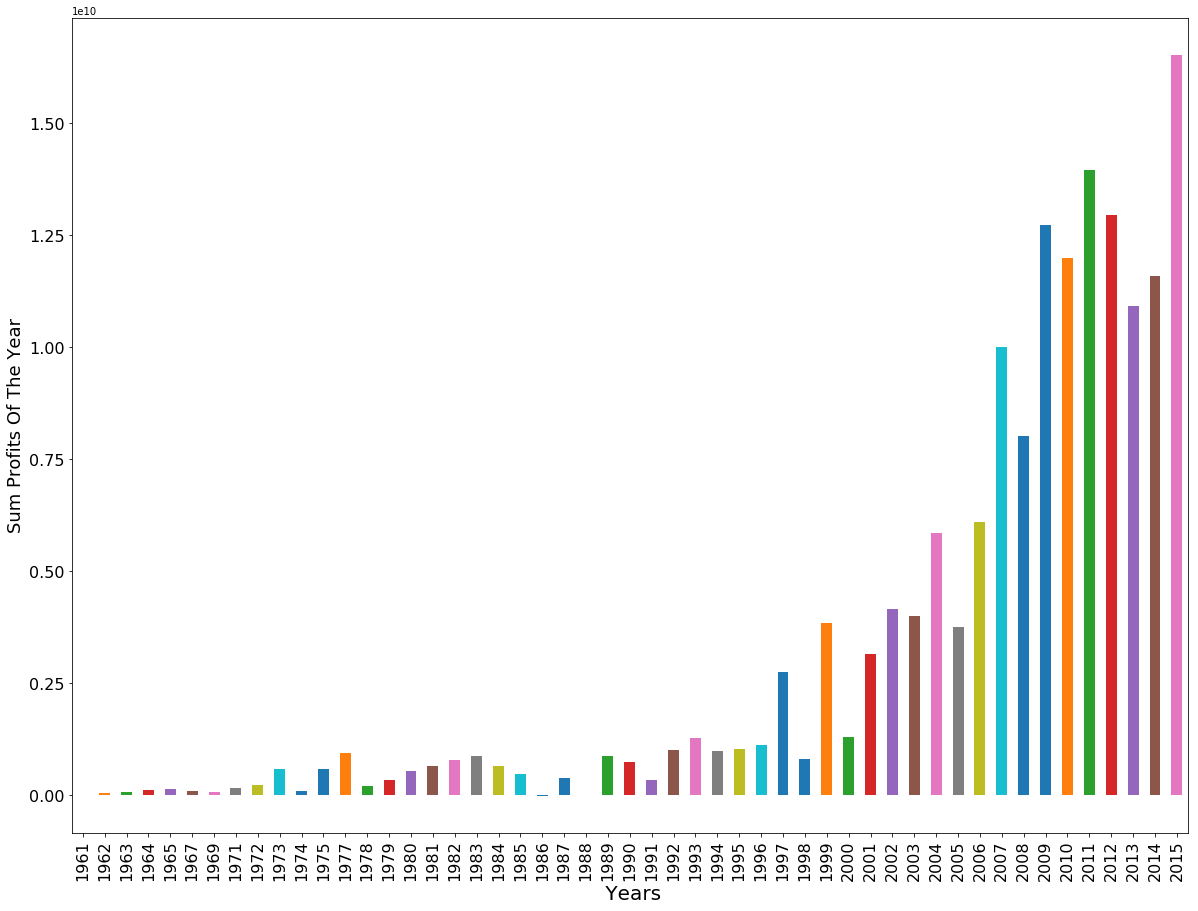

In [259]:
## Create a data set with the year and the total profit by this year
profits = pd.DataFrame()
profits['year'] = df['release_year']
profits['profit'] = df['profit_earned']
nprofit= pd.DataFrame()
nprofit = profits.groupby('year')['profit'].sum()

## display the tuple :

nprofit.plot.bar(figsize = (20, 15),fontsize=16);
plt.ylabel('Sum Profits Of The Year', fontsize = 18);
plt.xlabel(' Years', fontsize = 20);

## Research Question 4: the most popular produced genres in 2010 compared to 2014?


In [260]:
## Create 2010 DataFrame To Fill into it the gen data
year2010= pd.DataFrame()
## Copy only data for 2010 year:
year2010 = df_gen[df_gen['release_year']==2010].copy()
## Drop release year coloumn:
year2010.drop('release_year' , axis = 1 , inplace= True)
## Store The Value Counts Of The specfic Genre into the dataset :
year2010 = year2010.stack().value_counts()
## display
year2010

Action             9
Adventure          6
Comedy             6
Thriller           6
Fantasy            5
Science Fiction    4
Mystery            4
Drama              4
Horror             3
Animation          2
Crime              2
Family             2
Western            2
dtype: int64

In [261]:
## Create 2014 DataFrame To Fill into it the gen data
year2014 = pd.DataFrame()
## Copy only data for 2014 year:
year2014 = df_gen[df_gen['release_year']==2014].copy()
## Drop release year coloumn:
year2014.drop('release_year' , axis = 1 , inplace = True )
## Store The Value Counts Of The specfic Genre into the dataset :
year2014 = year2014.stack().value_counts()
##Display
year2014



Action             5
Adventure          5
Comedy             5
Fantasy            4
Animation          3
Family             2
Romance            2
Crime              1
Science Fiction    1
Drama              1
Mystery            1
dtype: int64

In [262]:
## concat the two data sets
year22 = pd.concat([year2010 ,year2014]  ,axis = 1 , sort=False)
## Give the columns names :
year22.columns = ['2010' , '2014']
## Replace nan With Zeros:
year22['2010'].replace(np.NAN , 0 , inplace = True)
year22['2014'].replace(np.NAN , 0 , inplace = True)
## Correct the Data Type :
year22['2010'] = year22['2010'].astype(int)
year22['2014'] = year22['2014'].astype(int)




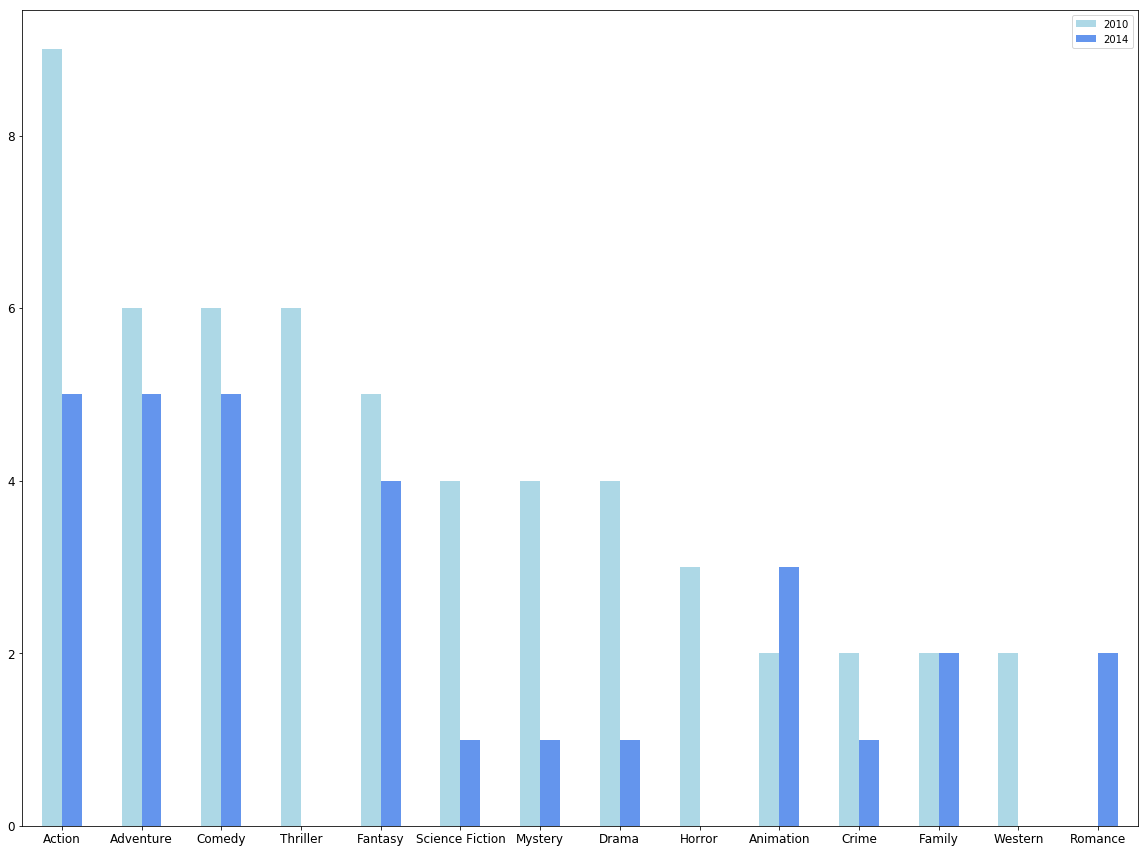

In [268]:
## Display 2 bar chart :
color = ['lightblue' , 'cornflowerblue']
dig = year22.plot.bar(rot=0 ,figsize=(20,15) ,fontsize=12 , color=color)

- ## 2010 most popular Genre was " ACTION " 
- ## 2014 most popular Genre were "ACTION , ADVENTURE , COMDEY"

<a id='conclusions'></a>
## Conclusions

- many of intersting analysis in this data set!! facts and reality about the movies data .
- first research question "genres are most popular from year to year?" as the most popular genre changed a lot Adventure takes place
- second reserch question "Movies which had most and least profit ?" by doing this analysis i get that theres films that gets so much lose related to the budget of the film and theres films taking revenue more than the budget by multiple times .
- third reserch question "Profitability vs Year of release ?" i get that the most year of gaining profits was 2015 year 
- forth reserch question " the most popular produced genres in 2010 compared to 2014 " i get that year 2010 best genres was Action, year 2014 best genres were action , adventure and comdey 

## limititions 
- these analysis was with no advanced statistics :


In [269]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0